# Sparse PCA triplets

Goal: Check if sparse PCA with region filters gives better results (especially for PC3) than the DS filtering.

Results: Sparse PCA selects for very different genes in each triplet (

### Setup

In [20]:
# Import modules and jupyter extensions
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [22]:
# Import local code
import sys
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *

In [26]:
%%R
source("../code/Rplots.R")
source("../code/brainPlots.R")

## Process AHBA with/without DS filter

Want to see if sparse PCA can replace DS filter

In [27]:
files = abagen.fetch_microarray(donors='all', data_dir='../data/abagen-data/microarray')
donors = list(files.keys())

In [28]:
from itertools import combinations
triplets_list = [list(x) for x in list(combinations(range(6), 3))]
triplets_names = [''.join(map(str,x)) for x in triplets_list]
triplets_dict = dict(zip(triplets_names, triplets_list))
triplets_dict_donors = {k:[donors[i] for i in v] for k,v in triplets_dict.items()}
disjoint_triplets = [list(x) for x in combinations(triplets_names,2) if not any(set(list(x[0])).intersection(set(list(x[1]))))]

Get HCP triplets with region filter but no DS filter

In [31]:
hcp_triplets_3donors = {}
for name, donors in triplets_dict_donors.items():
    expression, stability = get_expression_abagen(
        fetch_hcp(), donors=donors,
        probe_selection='diff_stability', 
        region_agg='donors',
        lr_mirror='rightleft',
        donors_threshold=3,
        # DS_threshold=0.8,
        return_stability=True
    )
    hcp_triplets_3donors[name] = pcaVersion(expression, message=False)
    hcp_triplets_3donors[name].stability = stability

15665 genes remain after filtering for top 1 differential stability
15701 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15926 genes remain after filtering for top 1 differential stability
15564 genes remain after filtering for top 1 differential stability
15728 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15755 genes remain after filtering for top 1 differential stability
15836 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15787 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16120 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16075 genes remain after filtering for top 1 dif

Also get AHBA PCs with all six, and no DS filter

In [32]:
hcp_base = pcaVersion(get_expression_abagen(atlas=fetch_hcp()))
hcp_3donors = pcaVersion(get_expression_abagen(atlas=fetch_hcp(), donors_threshold=3))

15946 genes remain after filtering for top 1 differential stability
New PCA version
15946 genes remain after filtering for top 1 differential stability
New PCA version


In [36]:
hcp_3donors = pcaVersion(get_expression_abagen(atlas=fetch_hcp(native=False), donors_threshold=3))

15947 genes remain after filtering for top 1 differential stability
New PCA version


## Try the Sparse PCA

In [72]:
hcp_3donors_sparse = pcaVersion(
    hcp_3donors.expression, sparse_alpha=3)

New PCA version


How many non-sparse genes do we get?

In [73]:
# hcp_3donors_sparse.coefs.shape
(hcp_3donors_sparse.coefs != 0).sum(axis=1)

0    5805
1    5124
2    6235
3    4233
4    5215
dtype: int64

In [74]:
(hcp_3donors.coefs
 .where(hcp_3donors_sparse.coefs != 0, other=0)
 .T
 .corrwith(hcp_3donors_sparse.coefs.T)
)

0   -0.870187
1   -0.841867
2   -0.441109
3   -0.419816
4   -0.590959
dtype: float64

### Get sparse versions of the triplets

In [89]:
hcp_triplets_3donors_sparse1 = {}
for name, donors in triplets_dict_donors.items():
    expression = hcp_triplets_3donors[name].expression
    hcp_triplets_3donors_sparse1[name] = pcaVersion(
        expression, sparse_alpha=1, message=False)

In [90]:
hcp_triplets_3donors_sparse2 = {}
for name, donors in triplets_dict_donors.items():
    expression = hcp_triplets_3donors[name].expression
    hcp_triplets_3donors_sparse2[name] = pcaVersion(
        expression, sparse_alpha=2, message=False)

In [77]:
hcp_triplets_3donors_sparse3 = {}
for name, donors in triplets_dict_donors.items():
    expression = hcp_triplets_3donors[name].expression
    hcp_triplets_3donors_sparse3[name] = pcaVersion(
        expression, sparse_alpha=3, message=False)

New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version


In [78]:
hcp_triplets_3donors_sparse4 = {}
for name, donors in triplets_dict_donors.items():
    expression = hcp_triplets_3donors[name].expression
    hcp_triplets_3donors_sparse4[name] = pcaVersion(
        expression, sparse_alpha=4, message=False)

New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version
New PCA version


## Plot triplets

In [91]:
coefs_dict = {
    'HCP 3donors': disjoint_corrs(hcp_triplets_3donors),
    'HCP 3donors sparse 1': disjoint_corrs(hcp_triplets_3donors_sparse1, match=False),
    'HCP 3donors sparse 2': disjoint_corrs(hcp_triplets_3donors_sparse2, match=False),    
    'HCP 3donors sparse 3': disjoint_corrs(hcp_triplets_3donors_sparse3, match=False),
    'HCP 3donors sparse 4': disjoint_corrs(hcp_triplets_3donors_sparse4, match=False),
}

scores_dict = {
    'HCP 3donors': disjoint_corrs(hcp_triplets_3donors, how='scores'),
    'HCP 3donors sparse 1': disjoint_corrs(hcp_triplets_3donors_sparse1, how='scores', match=False),
    'HCP 3donors sparse 2': disjoint_corrs(hcp_triplets_3donors_sparse2, how='scores', match=False),
    'HCP 3donors sparse 3': disjoint_corrs(hcp_triplets_3donors_sparse3, how='scores', match=False),
    'HCP 3donors sparse 4': disjoint_corrs(hcp_triplets_3donors_sparse4, how='scores', match=False),
}


triplet_versions = (
    pd.concat({'Gene weights':pd.concat(coefs_dict), 'Region scores':pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

How much overlap in non zero coefs? Not much! ~10-30%

In [87]:
nz1 = (hcp_triplets_3donors_sparse4['012'].coefs != 0)
nz2 = (hcp_triplets_3donors_sparse4['345'].coefs != 0)
(nz1 & nz2).sum(axis=1) / nz1.sum(axis=1)

0    0.302548
1    0.117202
2    0.194444
3    0.241916
4    0.445524
dtype: float64

In [88]:
nz1 = (hcp_triplets_3donors_sparse3['012'].coefs != 0)
nz2 = (hcp_triplets_3donors_sparse3['345'].coefs != 0)
(nz1 & nz2).sum(axis=1) / nz1.sum(axis=1)

0    0.179852
1    0.112266
2    0.198864
3    0.235390
4    0.170797
dtype: float64

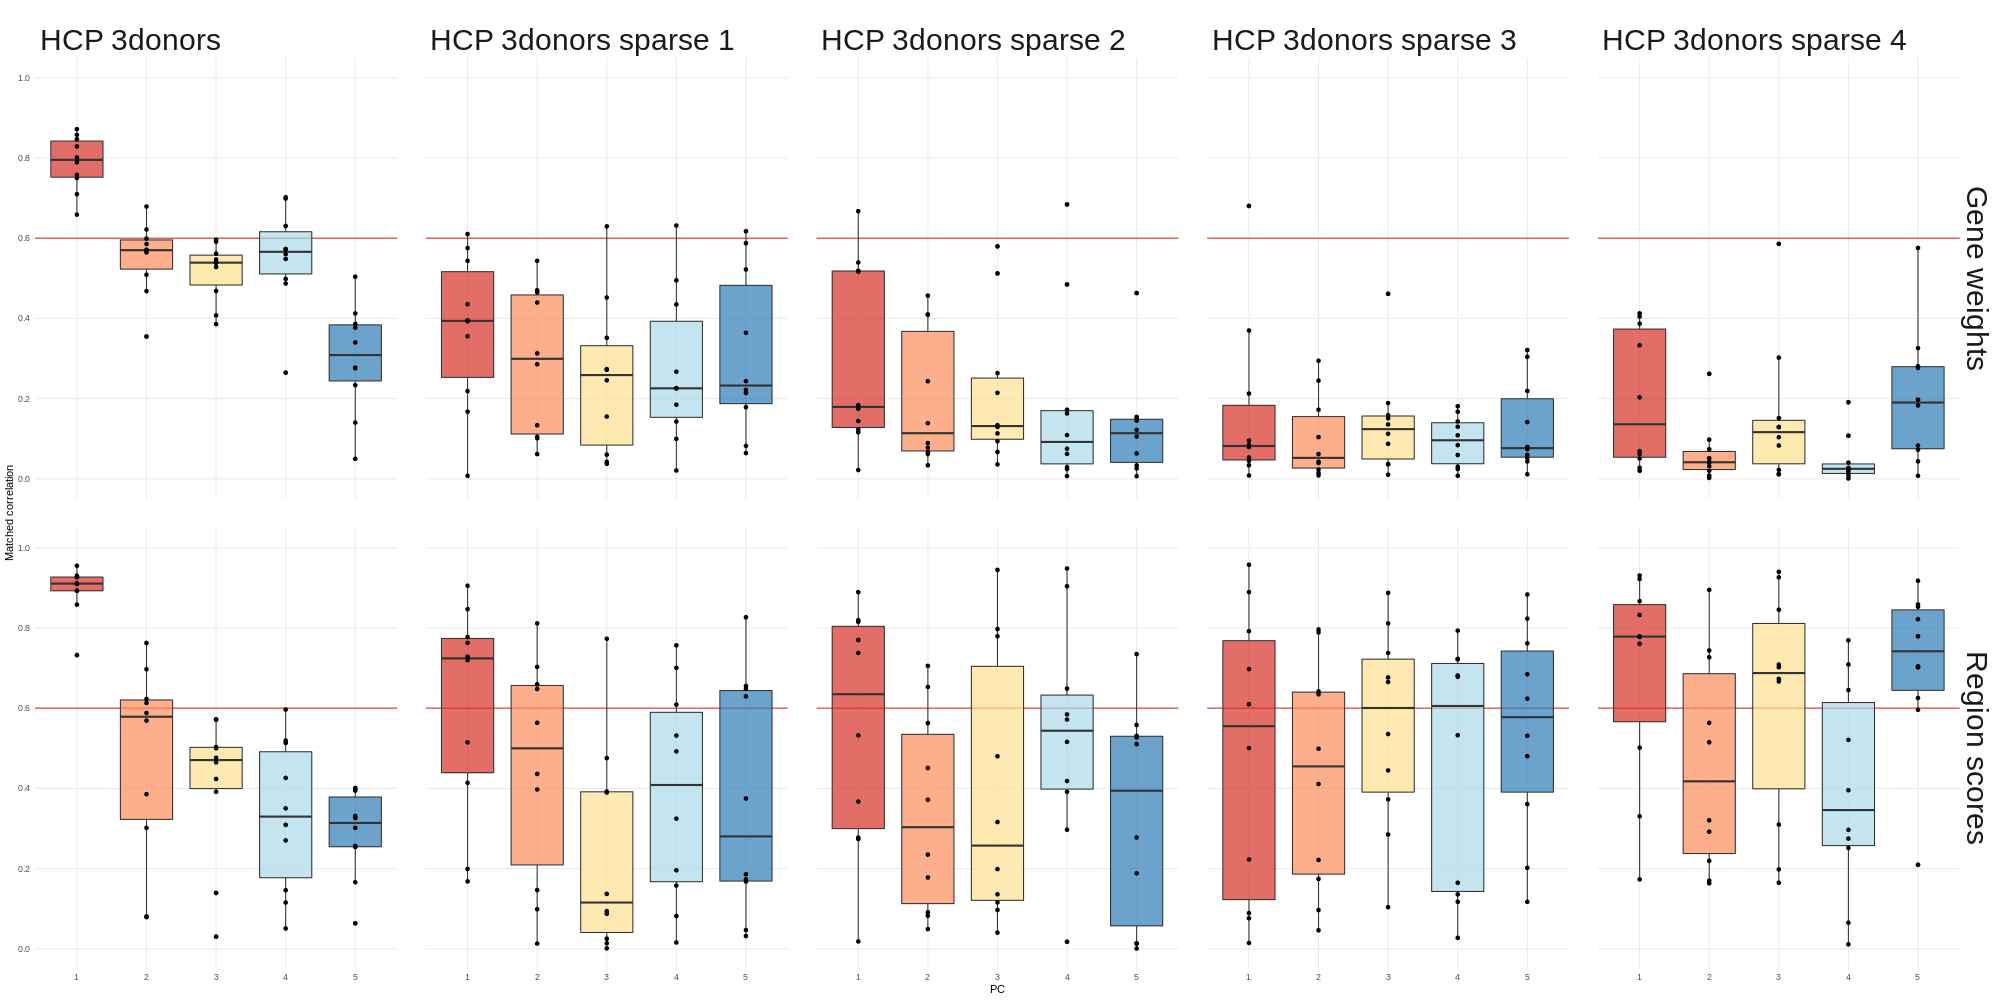

In [92]:
%%R -w 2000 -h 1000 -i triplet_versions
plot_triplets(triplet_versions)